## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Data Camp Peter Pan Word Frequency Unguided Project</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>This notebook explores and analyzes Peter Pan's text to find among the top ten most common meaningful words in the text, which ones are character names. I worked with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. </p>


In [1]:
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter

In [2]:
r = requests.get('https://www.gutenberg.org/files/16/16-h/16-h.htm')

r.encoding = 'utf-8' #ecoding on website uses utf-8

html = r.text

In [3]:
soup = BeautifulSoup(html)

text = soup.text

#print(text[:2000])

In [4]:
#tokenization 

tokenizer = nltk.tokenize.RegexpTokenizer('\w+') 
# \w+ letter or digit character - one of more expression 

tokens = tokenizer.tokenize(text)

print(tokens[:6])


['Peter', 'Pan', 'by', 'J', 'M', 'Barrie']


In [5]:
#lowercase tokens 
words = [token.lower() for token in tokens]

print(words[:6])

['peter', 'pan', 'by', 'j', 'm', 'barrie']


In [6]:
# remove stop words - only want meaniful words

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isa.adls/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words = nltk.corpus.stopwords.words('english')

In [8]:
words_clean = [word for word in words if word not in stop_words]

print(words_clean[:6])

['peter', 'pan', 'j', 'barrie', 'body', 'margin']


In [9]:
#count words

count = Counter(words_clean)

top_ten = count.most_common(10)

print(top_ten)

[('peter', 410), ('wendy', 362), ('said', 358), ('would', 219), ('one', 214), ('hook', 175), ('could', 142), ('cried', 136), ('john', 133), ('time', 126)]


In [10]:
# ANSWER - character names 

protagonists = ['peter', 'wendy', 'hook', 'john']

In [11]:
#extra 

# how to remove html and css 

trimmed_text = text[2583:]
#print(trimmed_text[:1000])

Text(0.5, 1.0, 'Peter Pan most common words')

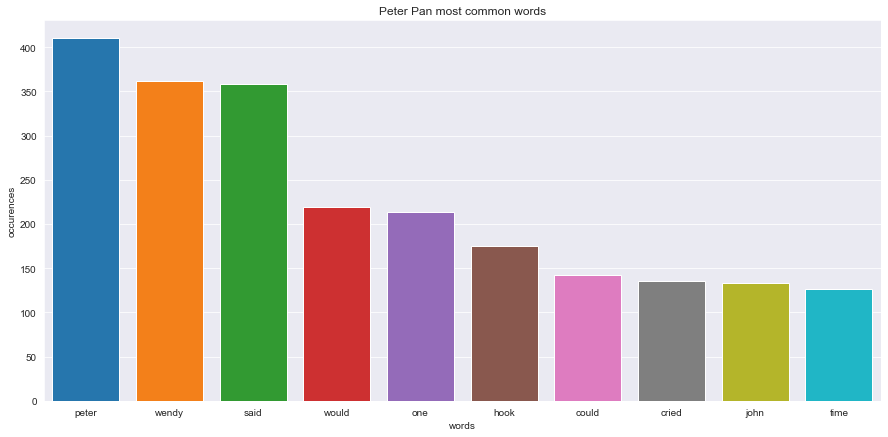

In [12]:
#visualization 

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

df = pd.DataFrame(top_ten, columns = ['words', 'occurences'])

sns.set_style('darkgrid')
plt.figure(figsize =[15,7])
sns.barplot(x = 'words', y = 'occurences', data = df, saturation = 0.9).set_title('Peter Pan most common words')
